Utilizando o banco de dados de Câncer da biblioteca do sklearn, realize os passos da aula passada e diga:

1-Acurácia Train entire model: KNN(1), KNN(5) e LogReg

2-Acurácia Train/Test Split : KNN(1), KNN(5) e LogReg

3-Gráfico de Tunning KNN(1-25)

4-Qual o melhor modelo com a melhor acurácia?

** O MODELO COM MELHOR ACURÁCIA FOI O knn_1 com entire_model **

Envie o link com seu código no github

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

breastCancerData = load_breast_cancer()
#print("Cancer Keys: \n{}\n".format(cancer.keys()))
#print(cancer.data)
entireModelX = breastCancerData.data
entireModelY = breastCancerData.target

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

knn_1 = KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [20]:
yPred_knn_1 = knn_1.predict(X_test)
print('Acurácia do knn_1 com test_split:', metrics.accuracy_score(y_test, yPred_knn_1))


Acurácia do knn_1 com test_split: 0.9263157894736842


In [21]:
knn_1.fit(entireModelX, entireModelY)
yPred_knn_1 = knn_1.predict(X_test)
print('Acurácia do knn_1 com entire_model:', metrics.accuracy_score(y_test, yPred_knn_1))

Acurácia do knn_1 com entire_model: 1.0


In [22]:
knn_5 = KNeighborsClassifier(n_neighbors = 5)
knn_5.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [23]:
yPred_knn_5 = knn_5.predict(X_test)
print('Acurácia do knn_5 com test_split:', metrics.accuracy_score(y_test, yPred_knn_5))


Acurácia do knn_5 com test_split: 0.9368421052631579


In [24]:
knn_5.fit(entireModelX, entireModelY)
yPred_knn_5 = knn_5.predict(X_test)
print('Acurácia do knn_5 com entire_model:', metrics.accuracy_score(y_test, yPred_knn_5))

Acurácia do knn_5 com entire_model: 0.9543859649122807


In [25]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=5000)

logReg.fit(X_train, y_train)
yPredLogReg = logReg.predict(X_test)

In [26]:
print('Acurácia do LogisticRegression com test_split:', metrics.accuracy_score(y_test, yPredLogReg))


Acurácia do LogisticRegression com test_split: 0.9578947368421052


In [28]:
logReg = LogisticRegression(max_iter=4000)
logReg.fit(entireModelX, entireModelY)
yPredLogReg = logReg.predict(X_test)
print('Acurácia do LogisticRegression com entire_model:', metrics.accuracy_score(y_test, yPredLogReg))

Acurácia do LogisticRegression com entire_model: 0.9754385964912281


Text(0, 0.5, 'Acurácia')

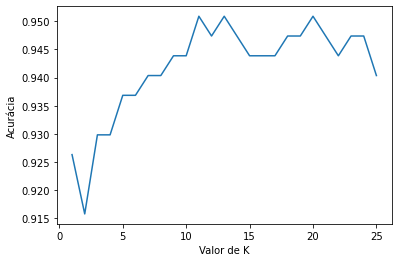

In [31]:
k_range = list(range(1,26))
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(k_range, scores)
plt.xlabel('Valor de K')
plt.ylabel('Acurácia')